# Sequences Visualized

## From Puzzles to Applications

Now for something important. Solving something like consequetive sums with the Gauss formula can seem like it's merely puzzle solving. It's cool. It's elegant but does it mean anything beyond being an impressive trick? Where is the application? Applications are really what most people are interested in, most people are not all that interested in puzzles and tricks. Once a new intuition, formula, or procedure is discoverd it makes sense to start looking for applications. This is another endeavour that is both creative and analytical.

## Sequences

Consecutive sums is a sequence, a pattern that repeats. Sequences and patterns exist everywhere in nature.

<img src="images/flower-2.jpg" height="250" width="250">

<span stype="font-size: 6px;">Photo by <a href="https://unsplash.com/@studiokiek?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Kiki Siepel</a></span>

If we turn consequtive sums into a visual, we might find something that we recognize in nature. That connection to nature is the first potential lead to an application.

Here we'll use code to draw, but pencil and paper is better for generating rough, quick ideas for how to visualize.

## Low Level Code for Drawing

First import our needed libraries.

In [603]:
from io import BytesIO

import cairo
import IPython.display
import math

### Draw Unit

Next we'll define a function to draw a single unit. A simple shape will do and we'll use circles. We could've picked squares or another simple shape, doesn't really matter.

In [615]:
def draw_circle(ctx, x, y):
    ctx.set_line_width(0.45)
    ctx.arc(x, y, 0.22, 0, 2*math.pi)
    ctx.stroke()

# Test draw_circle
svg = BytesIO()
with cairo.SVGSurface(svg, 20, 20) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_circle(ctx, 1, 1)
    
IPython.display.SVG(data=svg.getvalue())

### Draw Part of the Sequence

Now something to represent each part of the sequence. The first part of the sequence will be a single circle, the second set will be two circles, then three, and so on. To start let's lay them out flat in a row.

We can loop through the number of times we are in the sequence and draw a circle each time. As we loop we'll use the iterator to offset the x origin of the circle. If we didn't do this, we'd draw all the circles in the same place and it would look like one circle.

In [618]:
def draw_sequence_part(ctx, number_in_sequence, x_origin, y_origin):
    for c in range(number_in_sequence):
        x_offset = c
        draw_circle(ctx, x_origin + x_offset, y_origin)
        
# Test draw_sequence_part   
svg = BytesIO()
with cairo.SVGSurface(svg, 100, 20) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_sequence_part(ctx, 5, 1, 1)
    
IPython.display.SVG(data=svg.getvalue())

Looks good `draw_sequence_part()` with `number_in_sequence = 5` gives us a flat row of 5 units (circles).

## First Sequence Drawing

Now we've got the low level drawing functions to work with. It's time for the attempt to draw the sequence. The most basic version seems like the parts of the sequence laid out flat in rows as well.

We can accomplish this by looping through `n` and drawing the sequence part each time. As we loop we need to keep offsetting the x origin to push the sequence parts across horizontal space.

In [638]:
def draw_consecutive_sums_flat(ctx, n):
    x_offset = 1
    for sequence_part in range(1, n + 1):
        draw_sequence_part(ctx, sequence_part, x_offset, 1)
        x_offset += sequence_part + 1
        
# Test draw_consecutive_sums_flat   
svg = BytesIO()
with cairo.SVGSurface(svg, 1000, 20) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_consecutive_sums_flat(ctx, 5)
    
IPython.display.SVG(data=svg.getvalue())

The `x_offset` was the trickiest part of this one. We keep adding to it each time we go up the sequence adding the `sequence_part + 1` to make sure the sequence part `x_origin` has some separation from the previous sequence part. This took some trial and error.

Now we have something drawn. But it doesn't give us much intuition. It more or less looks like the original sequence in math land.

```
1 + 2 + 3 + 4 + 5
```

We could make it even look the same if we just summed up all the ones.

```
(1) + (1 + 1) + (1 + 1 + 1) + (1 + 1 + 1 + 1) + (1 + 1 + 1 + 1 + 1)
```

So not much intuition gained but we have some raw material to draw some other ways of drawing.

## Second Sequence Drawing

Our low level functions are still good. Let's experiment with how we separate the sequence parts. Rather than push them apart horizontally let's stack vertically.

This is actually simpler than the flat version. `x_offset` is static and we can just use the `sequence_part` iterator as the `y_offset`.

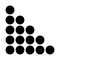

In [644]:
def draw_consecutive_sums_stacked(ctx, n):
    for sequence_part in range(1, n + 1):
        y_offset = sequence_part
        draw_sequence_part(ctx, sequence_part, 1, y_offset)
        
# Test draw_consecutive_sums_stacked
svg = BytesIO()
with cairo.SVGSurface(svg, 100, 60) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_consecutive_sums_stacked(ctx, 5)
    
IPython.display.SVG(data=svg.getvalue())

Unlike the flat drawing, this visual is ripe for some intuition mining. It looks like stairs going down. It looks like a steady slope. It looks like a wedge. There are many things it resembles in nature.

## Third Sequence Drawing

With just a little tweaking we could make this look like a triangle. We just need to add back a little `x_offset`.

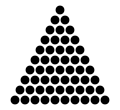

In [662]:
def draw_triangular_consecutive_sums(ctx, n):
    for sequence_part in range(1, n + 1):
        y_offset = sequence_part
        x_offset = 1 + (n * 0.55) - (sequence_part / 2)
        draw_sequence_part(ctx, sequence_part, x_offset, y_offset)
        
# Test draw_triangular_consecutive_sums
svg = BytesIO()
with cairo.SVGSurface(svg, 120, 110) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_triangular_consecutive_sums(ctx, 10)

IPython.display.SVG(data=svg.getvalue())

## Fin

We could keep going. We could use the sequence to draw circular structures like spirals. We could try drawing in 3 dimmensions. But we'll stop here for now.

We first talked about transforming the intuition from a puzzle into an application. Well now you can answer the question: How many blocks do you need to create a starway with 10 stairs? And if you remember to apply Gauss's formula, you don't have to draw and count ahead of time. The formula gives you a model for knowing the answer, without any counting or visualization procedures. 

There are other applications but more powerful than the specific "stairs" application are the general applications. We have a powerful formula to describe triangles! Triangles exist all over the place in nature. We can efficiently calculate "Triangular Growth" with very large numbers. Triangles are a foundational tool for other shapes and patterns.

Next, we will see how "Triangular Growth" is another tool that can be used to find intuition about more complex visual structures. Once we do that we can convert complex visual structures into formulas because they link to triangles. Once we do that we will have gone full circ.e